#   EDSA: MOVIE RECOMMENDATION 2022  
*unsupervised learning*

© Explore Data Science Academy

#  2201FT_Team GM2  

Honour Code
We {***Team GM2***}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.

#  MEET THE TEAM!  
[Lindiwe Songelwa](https://www.linkedin.com/in/lindiwe-songelwa/)

[Thabang Pardon Mokoena](https://www.linkedin.com/in/thabang-pardon-mokoena/)

[Sizakele Beauty Mtsweni](https://www.linkedin.com/in/sizakele-beuty-mtsweni-236935172/)

[Nkoka Khosa](https://www.linkedin.com/)

[Elizabeth Matlala](https://www.linkedin.com/)

[Kanego Kgabalo](https://www.linkedin.com/)


# PREDICT OVERVIEW

*Recommender systems are the systems that are designed to recommend things to the user based on many different factors, they deal with a large volume of information present by filtering the most important information based on the data provided by a user and other factors that take care of the user’s preference and interest.*
 
 *Having the ability to predict user ratings, even before the user has provided one, makes recommender systems a powerful tool. The recommender system analyzes and finds items with similar user engagement data by filtering. It uses different analysis methods such as batch analysis, real-time analysis, or near-real-time system analysis.*
 
 *Recommender systems can be a powerful tool for any e-commerce business, and rapid future developments in the field will increase their business value even further.*


#  PROBLEM STATEMENT 

> Create a collaborative or content based filtering algorithm that will predict how a user will rate a movie they have not yet seen
 

![](https://wallpaperaccess.com/full/4839516.jpg)

<a id="cont"></a>

## <u> Table of Contents </u> 

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Important Functions</a>

<a href=#three>3. Loading and Pre-processing Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Model Explanations</a>

<a href=#six>6. Modelling</a>

<a href=#seven>7. Model Performance / Validation</a>

<a href=#eight>8. Reference</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| 📽 Description: Importing Packages 📽 |
| :--------------------------- |
| In this section we will import, and briefly discuss, the libraries that will be used throughout our analysis and modelling. |

---

In [1]:
# Import our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot 
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import re

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

#NLP libraries
from nltk.corpus import stopwords
import string
import nltk

# Models
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering,KNNWithMeans,KNNBasic,accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise.model_selection import cross_validate,train_test_split
 
# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

In [2]:
# Load Suprise Package
!pip install git+https://github.com/Explore-Unsupervised-Learning-TEAM-GM2/Surprise

  Cloning https://github.com/Explore-Unsupervised-Learning-TEAM-GM2/Surprise to /tmp/pip-req-build-prig9qfc
  Running command git clone --filter=blob:none --quiet https://github.com/Explore-Unsupervised-Learning-TEAM-GM2/Surprise /tmp/pip-req-build-prig9qfc
  Resolved https://github.com/Explore-Unsupervised-Learning-TEAM-GM2/Surprise to commit 26238c9da59081a2c3e0e573d72355331471306e
  Preparing metadata (setup.py) ... done


<div class="alert alert-block alert-success"> 
 <b>Data description:</b> 

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

Our datasets is divided into numeric and categorical data, where;
* Categorical data is defined as a type of data that is used to group information with similar characteristics while
* Numerical data is defined a type of data that expresses information in the form of numbers.
</div>     

 <a id="two"></a>
## 2. Important Functions
<a href=#cont>Back to Table of Contents</a>

---
    
| 📽 Description: Important Functions 📽 |
| :--------------------------- |
| In this section we are coding important functions that will be used later in the notebook. |

---


In [3]:
#defining a function for removing punctuations

punctuations = string.punctuation 

def remove_punctuation(text):
    
    '''removes punctuation and any special characters from a text .
   Args:
        text (str) : containing text data
    
    returns:
        dataframe(df): dataframe with tokens within the specified column.
    '''

    return text.translate(str.maketrans(' ',' ', punctuations))

In [4]:
#removing numbers
def remove_numbers(df, colname):
    ''' Function removes numbers using regex search
    Arg:
        dataframe (df): dataframe that has a text column
        colname(str): name of the column with text data and emojis
    return
        dataframe (df): dataframe with no numbers from the text data
    '''
   
    num_pattern = r'[0-9]'
    df[colname] = df[colname].replace(to_replace = num_pattern, value = '', regex = True)

    return df

In [5]:
#removing letters
def remove_letters(df, colname):
    ''' Function removes letters using regex search
    Arg:
        dataframe (df): dataframe that has a text column
        colname(str): name of the column with text data and emojis
    return
        dataframe (df): dataframe with no letters from the text data
    '''
   
    num_pattern = r'^$|[a-zA-Z]|Τσιτσάνης|101次求婚|2006–2007|выбывание|پدر|Начальник|Джа|Девочки|первого'
    df[colname] = df[colname].replace(to_replace = num_pattern, value = np.nan, regex = True)

    return df

In [6]:
#Counts the number of user ratings
def user_ratings(df, n):
    plt.figure(figsize=(8,6))
    temp_df = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = temp_df.index, y = temp_df, order = temp_df.index, palette = 'bright', edgecolor = "black")
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width()/2., i.get_height(), '%d' % int(i.get_height()), fontsize=11, ha = 'center', va = 'bottom')
    plt.title(f'Top {n} Users by Ratings', fontsize = 14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

In [7]:
def ratings_dist(df, column='rating'):
    plt.figure(figsize=(30,50))
    ax = sns.displot(df[f'{column}'],bins=10, kde = False, color = "red")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x = mean, label = f'mean {round(mean,2)}' , color = '#1726A0', lw = 3, ls = '--')
    plt.axvline(x = median, label = f'median {median}' , color = '#FFFF00', lw = 3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings\n', fontsize = 12)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [8]:
def plot_ratings(count, n, color = 'red', best = True, method = 'mean'):
    if method == 'mean':
        movie_avg_rates = pd.DataFrame(train.merge(movies, on = 'movieId', how = 'left').groupby(['movieId', 'title'])['rating'].mean())
    else:
        movie_avg_rates = pd.DataFrame(train.merge(movies, on = 'movieId', how = 'left').groupby(['movieId', 'title'])['rating'].median())
    movie_avg_rates['count'] = train.groupby('movieId')['userId'].count().values
    movie_avg_rates.reset_index(inplace = True)
    movie_avg_rates.set_index('movieId', inplace = True)

    # Remove movies that have been rated fewer than n times
    movie_data = movie_avg_rates[movie_avg_rates['count'] > count]
    movie_data.sort_values('rating', inplace = True, ascending = False)
    if best == True:
        plot = movie_data.head(n).sort_values('rating', ascending = True)
        title = 'best rated'
    else:
        plot = movie_data.tail(n).sort_values('rating', ascending = False)
        title = 'worst rated'
    plt.figure(figsize = (10,9))
    sns.scatterplot(x = plot['rating'], y = plot['title'], size = plot['count'], color = color)
    plt.xlabel('rating')
    #plt.ylabel(off)
    plt.tick_params(axis = 'y', which ='both', labelleft = False, labelright = True)
    plt.title(f'Top {n} {title} movies with over {count} ratings', fontsize = 14)
    plt.show()


 <a id="three"></a>
## 3. Loading and Pre-processing Data
<a href=#cont>Back to Table of Contents</a>

---
    
| 📽 Description: Importing Packages & Pre-processing 📽 |
| :--------------------------- |
| In this section we are importing all the csv files with the use of the pandas library that contain our movie's data and converted them into dataframes for our analysis.
  Perform summary statistics on the datasets; checking for null values, descriptive statistics and summary statistics|

---


<div class="alert alert-block alert-danger">
<b>Danger:</b> First we will run a function for reducing memory usage of a pandas dataframe, because there are a lot of csv files 
</div>



In [9]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df



In [10]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df
print('-' * 80)
print('train')
train = import_data('../input/edsa-movie-recommendation-2022/train.csv')

print('-' * 80)
print('test')
test = import_data('../input/edsa-movie-recommendation-2022/test.csv')

print('-' * 80)
print('movies')
movies = import_data('../input/edsa-movie-recommendation-2022/movies.csv')

print('-' * 80)
print('tags')
tags = import_data('../input/edsa-movie-recommendation-2022/tags.csv')

print('-' * 80)
print('imdb')
# specify which columns to include by name
imdb = import_data('../input/edsa-movie-recommendation-2022/imdb_data.csv')



--------------------------------------------------------------------------------
train
Memory usage of dataframe is 305.18 MB
Memory usage after optimization is: 133.52 MB
Decreased by 56.2%
--------------------------------------------------------------------------------
test
Memory usage of dataframe is 76.29 MB
Memory usage after optimization is: 38.15 MB
Decreased by 50.0%
--------------------------------------------------------------------------------
movies
Memory usage of dataframe is 1.43 MB
Memory usage after optimization is: 3.16 MB
Decreased by -121.3%
--------------------------------------------------------------------------------
tags
Memory usage of dataframe is 33.37 MB
Memory usage after optimization is: 19.26 MB
Decreased by 42.3%
--------------------------------------------------------------------------------
imdb
Memory usage of dataframe is 1.25 MB
Memory usage after optimization is: 2.01 MB
Decreased by -60.9%


<div class="alert alert-block alert-success">
<b>Success:</b> The memory has been reduced.
</div>

In [11]:
print (f'Number of rows in train set: {train.shape[0]}')
print (f'Number of rows in test set: {test.shape[0]}')
print (f'Number of rows in movies test: {movies.shape[0]}')
print (f'Number of rows in imdb set: {imdb.shape[0]}')
print (f'Number of rows in tags set: {tags.shape[0]}')

Number of rows in train set: 10000038
Number of rows in test set: 5000019
Number of rows in movies test: 62423
Number of rows in imdb set: 27278
Number of rows in tags set: 1093360


In [12]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [13]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


<div class="alert alert-block alert-success"> 
 <b>why we are merging the datasets:</b>
    
we combined them into one dataset, for the purpose of eda. However since we have multiple csv files which do not contribute to our final model in anyway, we will leave the train and test data as is. The following sections until modeling will only focus on the additional csv files that we will use in our web app
</div>        

In [14]:
#merge datasets
movies = pd.merge(movies,imdb,on="movieId")
movies = pd.merge(movies,tags,on="movieId")

#view new dataset
movies.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791,Owned,1515175493
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048,imdb top 250,1172144394
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361,Pixar,1216146311
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,Pixar,1223304727
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,time travel,1223304729


In [15]:
# a quick overview of the data
print("Movies Dataset Info Total Rows | Total Columns | Total Null Values \n")
print(movies.info())
print("---------------------------------------------------------------------")


Movies Dataset Info Total Rows | Total Columns | Total Null Values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903067 entries, 0 to 903066
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   movieId        903067 non-null  int32   
 1   title          903067 non-null  category
 2   genres         903067 non-null  category
 3   title_cast     676067 non-null  category
 4   director       676944 non-null  category
 5   runtime        662744 non-null  float16 
 6   budget         584539 non-null  category
 7   plot_keywords  673753 non-null  category
 8   userId         903067 non-null  int32   
 9   tag            903051 non-null  category
 10  timestamp      903067 non-null  int32   
dtypes: category(7), float16(1), int32(3)
memory usage: 41.2 MB
None
---------------------------------------------------------------------


In [16]:
movies.shape

(903067, 11)

<div class="alert alert-block alert-success"> 
 <b>What we have learnt so far:</b> 
    
* The runtime has an average of 100.31 minutes with a minimum of 1 minute and a maximum of 877 minutes.
    
* 75% of the runtime is less than 109 minutes with a median of 98 minutes.

*  large number of feaures lead to overfitting we have to perform feature reduction and/or dimensionality reduction
    
* some features are redundant; they are not necessary for modeling    
    
 </div>      

In [17]:
#checking null values

print('\nSummary of movies data missing values\n')
print('{}\n'.format(movies.isna().sum()))

print('\nSummary of test data missing values\n')
print('{}\n'.format(test.isna().sum()))

print('\nSummary of train data missing values\n')
print('{}\n'.format(train.isna().sum()))


Summary of movies data missing values

movieId               0
title                 0
genres                0
title_cast       227000
director         226123
runtime          240323
budget           318528
plot_keywords    229314
userId                0
tag                  16
timestamp             0
dtype: int64


Summary of test data missing values

userId     0
movieId    0
dtype: int64


Summary of train data missing values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64



In [18]:
missing_values = movies.title_cast.isna().sum()
print(f'Missing Values: {missing_values}  |   Percentage: {round(( missing_values/ movies.title_cast.shape[0]) *100, 2)}%')

Missing Values: 227000  |   Percentage: 25.14%


In [19]:
missing_values = movies.director.isna().sum()
print(f'Missing Values: {missing_values}  |   Percentage: {round(( missing_values/ movies.director.shape[0]) *100, 2)}%')

Missing Values: 226123  |   Percentage: 25.04%


In [20]:
missing_values = movies.runtime.isna().sum()
print(f'Missing Values: {missing_values}  |   Percentage: {round(( missing_values/ movies.runtime.shape[0]) *100, 2)}%')

Missing Values: 240323  |   Percentage: 26.61%


In [21]:
missing_values = movies.tag.isna().sum()
print(f'Missing Values: {missing_values}  |   Percentage: {round(( missing_values/ movies.tag.shape[0]) *100, 2)}%')

Missing Values: 16  |   Percentage: 0.0%


In [22]:
missing_values = movies.budget.isna().sum()
print(f'Missing Values: {missing_values}  |   Percentage: {round(( missing_values/ movies.budget.shape[0]) *100, 2)}%')

Missing Values: 318528  |   Percentage: 35.27%


###Dimensionality reduction

In [23]:
# Remove column name 'timestamp'
movies = movies.drop(['timestamp'], axis=1)

In [24]:
movies.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791,Owned
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048,imdb top 250
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361,Pixar
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,Pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,time travel


### Datacleaning

In [25]:
#creating a new column for year
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)

In [26]:
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)

In [27]:
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
movies.head()                                           

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791,Owned,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048,imdb top 250,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361,Pixar,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,Pixar,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,time travel,1995


In [28]:
# datacleaning

#removing punctuations from title 
movies.title = movies.title.apply(remove_punctuation)

#removing punctuations from genres
movies.genres = movies.genres.str.replace('|',' ',regex = True)
movies.genres = movies.genres.apply(remove_punctuation)

#removing punctuations from title_cast
movies.title_cast = movies.title_cast.str.replace('|',' ',regex = True)
movies.title_cast = movies.title_cast.astype(str).apply(remove_punctuation)

#removing punctuations from director
movies.director = movies.director.str.replace('|',' ',regex = True)
movies.director = movies.director.astype(str).apply(remove_punctuation)
movies.director = movies.director.dropna()

movies.head()


,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,year
0,1,Toy Story,Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791,Owned,1995
1,1,Toy Story,Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048,imdb top 250,1995
2,1,Toy Story,Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361,Pixar,1995
3,1,Toy Story,Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,Pixar,1995
4,1,Toy Story,Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,time travel,1995


In [29]:
missing_values = movies.year.isna().sum()
print(f'Missing Values: {missing_values}  |   Percentage: {round(( missing_values/ movies.year.shape[0]) *100, 2)}%')

Missing Values: 59  |   Percentage: 0.01%


<div class="alert alert-block alert-info"> 
 <b>What we have learnt so far:</b> 

    
1. The train data has:
*  <b>*10000038</b>  rows*
*  no missing values
* four columns    
    
2. The test data has:
*  <b>*5000019</b>  rows*
*  two columns   
    
3. The object datatypes are the only columns with empty rows
    
4. We have multiple datasets with multiple features:
*  irrelevant features introduce noise 
*  some features are redundant
*  large number of feaures lead to overfitting
    
**We have to perform feature reduction and/or dimensionality reduction**    
        
</div>         

 <a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

| 📽 *Description: Exploratory Data Analysis* 📽 |
| :--------------------------- |
  In this section, we will perform an in-depth analysis of all the variables in the dataframe. 
  We analyse the data using visual techniques,this is used to discover trends, patterns,
  or to check assumptions with the help of statistical summary and graphical representations.
  Essentially, we want to see how everything is related to each other

<div class="alert alert-block alert-success">
<b>P.S:</b> for in this notebook we will be focusing more on the features related to the movie and how they compare to each other.
</div>


### Ratings
*Check the rating of the movies for any insights*

In [30]:
movies['runtime'].describe()

count    662744.0
mean          NaN
std           NaN
min           1.0
25%          99.0
50%         112.0
75%         128.0
max         877.0
Name: runtime, dtype: float64

Number of ratings:	 38970 
Total number of movies:		 48213


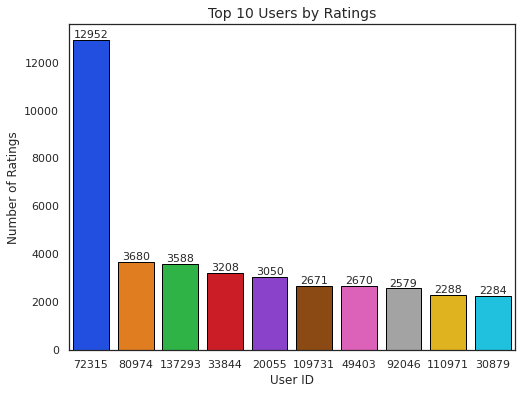

In [31]:
# the funtion for this cell is available in section 2 of the notebook
user_ratings(train,10)

In [32]:
train['rating'].value_counts(normalize=True)

4.0    0.265297
3.0    0.195975
5.0    0.144522
3.5    0.127064
4.5    0.088051
2.0    0.065682
2.5    0.050558
1.0    0.031121
1.5    0.015973
0.5    0.015757
Name: rating, dtype: float64

In [33]:
train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5], dtype=float16)

<Figure size 2160x3600 with 0 Axes>

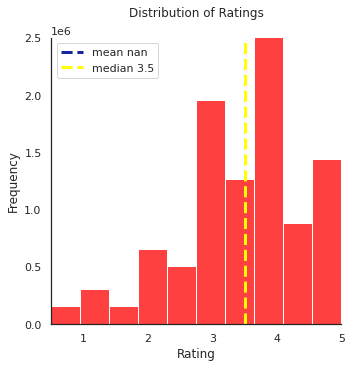

In [34]:
# the funtion for this cell is available in section 2 of the notebook
ratings_dist(train)

In [ ]:
plot_ratings(10000, 10, 'red', True, 'mean')

In [ ]:
plot_ratings(500, 10,'blue', False, 'mean')

<div class="alert alert-block alert-info"> 
 <b>What we have learnt so far:</b>
    
* The rating scale is between 0.5 and 4.0
* Average rating is 3.5    
* Highest rated movie is Shawshank Redemption
* Lowest rated movie is Battlefield Earth    
</div>    

### Directors
*Check the most popular directors for insights*

In [ ]:
#group director by rating
director = df.groupby(['director'])['rating'].sum().reset_index().sort_values('rating', ascending=False).head(10)
director

In [ ]:
fig = px.bar(director, x = 'rating', y = 'director', title= 'Top Rated Director',color='director', labels={"director": "Director", "rating": "Number of ratings"})
fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.show()

<div class="alert alert-block alert-info"> 
 <b>What we have learnt so far:</b>
    
* Top rated director is Quentin Tarantino
* Steven Spielberg has the least ratings
* Oddly, J.R.R Tolken, the South African author of The Lord of The Rings trilogies as well as The Hobbit books is listed as a director   
</div>

### Movies
*Check the most popular movie yearly for insights*

In [ ]:
# group by title to see which titles are most present in the dataframe
title = df.groupby(['title'])['title'].count().reset_index(name='Count').sort_values('Count', ascending=False).head(10)
title

In [ ]:
fig = px.bar(title, x = 'Count', y = 'title', title= 'Top Movies',color='title', labels={"title": "Titles", "Count": "Number of appearances"})
fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(df, values='title_cast', names='title_cast', title='Title Distribution')
fig.show()

In [ ]:
fig = px.sunburst(movies, path=['genres', 'director'], values='rating',
                  color='movieId', hover_data=['title'])
fig.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def wordCloud_generator(movies, title=None):
    wordcloud = WordCloud(width = 1000, height = 800,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(df.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(df['title'], title="Top Titles")

<div class="alert alert-block alert-info"> 
 <b>What we have learnt so far:</b>
    
* Top rated movies are all American
* Top rated movie are what film buffs consider classics
* Top 3 rated movies were released in the early 90s
* Top rated genre or genre combo is Drama    
    
</div>

 <a id="five"></a>
## 5. Model Explanations
<a href=#cont>Back to Table of Contents</a>

| 📽 *Description: Modeling* 📽 |
| :--------------------------- |
  In this section, we are explaining the models that are used in this notebook.
  
  ---

<div class="alert alert-block alert-success">
<b>P.S:</b>
Collaborative Filtering (CF) is a method of making automatic predictions about the interests of a user by learning its preferences (or taste) based on information of his engagements with a set of available items, along with other users’ engagements with the same set of items. 

In other words, CF assumes that, if a person A has the same opinion as person B on some set of issues X={x1,x2,…}, then A is more likely to have B‘s opinion on a new issue y than to have the opinion of any other person that doesn’t agree with A on X


CF algorithms are able to infer users’ hidden preferences and to exploit those preferences to recommend them new potentially-good items, algorithms are best known for their use on e-commerce web sites, where they serve as cornerstones for their recommendation-engines
</div>

### SVD

* Set of supervised learning methods used for classification, regression and outliers detection.
* Effective in high dimensional spaces.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

 <a href='#svd'>click to view code</a>

![](https://www.askpython.com/wp-content/uploads/2020/11/SVD-1.jpg.webp)

### Normal Predicator

 * Prediction algorithm available for recommendation
 * Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal. 
 
 <a href='#np'>click to view code</a>

### Baseline Only

* Algorithm predicting the baseline estimate for given user and item.
* Common baseline models include linear regression when predicting continuous values, logistic regression when classifying structured data, pretrained convolutional neural networks for vision related tasks, and recurrent neural networks and gradient boosted trees for sequence modeling

<a href='#BO'>click to view code</a>

### Non-negative Matrix Factorization

* The objective of NMF is dimensionality reduction and feature extraction
* Intuitively, NMF assumes that the original input is made of a set of hidden features, represented by each column of W matrix and each column in H matrix represents the ‘coordinates of a data point’ in the matrix W.
* Is used in major applications such as image processing, text mining, spectral data analysis and many more

<a href='#nmf'>click to view code</a>


### Co-Clustering (or Biclustering) 

* Simultaneous clustering of the rows and columns of a matrix. 
* Can be seen as a method of co-grouping two types of entities simultaneously, based on similarity of their pairwise interactions.
* Extremely useful when the above mentioned pairwise interactions signal is sparse

<a href='#co_clustering'>click to view code</a>

### Slope One

* A simple yet accurate collaborative filtering algorithm
* Slope One algorithm uses simple linear regression model to solve data sparisity problem.
* Used mostly in collaborative filtering

<a href='#slope_one'>click to view code</a>



 <a id="six"></a>
## 6. Modeling
<a href=#cont>Back to Table of Contents</a>

| 📽 *Description: Model Performance* 📽 |
| :--------------------------- |
  In this section, we peform the modeling with the train and test sets, then pick the best performing model.
  
  ---

![](https://www.bbvaapimarket.com/wp-content/uploads/2016/04/cibbva_modelo.png)

In [ ]:
# Load the train dataset
from surprise import Reader, Dataset
reader = Reader()
model = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

In [ ]:
# sample random trainset and testset
train_set,test_set = train_test_split(model,test_size=0.25,random_state=42)

### Singular Value Decomposition (SVD)
<a id='svd'></a>

In [ ]:
# svd
svd = SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)
svd.fit(train_set)
pred = svd.test(test_set)
svd_rmse = accuracy.rmse(pred)

<div class="alert alert-block alert-warning">
<b>Warning:</b> The following cells have not ran because of memory. RMSE comarrioson can be found on Comet
</div>

### Normal Predictor
<a id='np'></a>

In [ ]:
# np
np = NormalPredictor()
np.fit(train_set)
pred = np.test(test_set)
np_rmse = accuracy.rmse(pred)

### Baseline Only
<a id='BO'></a>

In [ ]:
# baseline
bsl = {'method': 'sgd','n_epochs': 40}
BO = BaselineOnly()
BO.fit(train_set)
pred = BO.test(test_set)
BO_rmse = accuracy.rmse(pred)

 ### Non-negative Matrix Factorization
 
 <a id='nmf'></a>

In [ ]:
# nmf
nmf = NMF()
nmf.fit(train_set)
pred = nmf.test(test_set)
nmf_rmse = accuracy.rmse(pred)

### Slope One

<a id='slope_one'></a>

In [ ]:
# slope one
slope = SlopeOne()
slope.fit(train_set)
pred = slope.test(test_set)
slope_rmse = accuracy.rmse(pred)

### Co-Clustering
<a id='co_clustering'></a>

In [ ]:
# co-clustering
c_cluster = CoClustering(random_state=42)
c_cluster.fit(train_set)
pred = c_cluster.test(test_set)
cluster_rmse = accuracy.rmse(pred)

 <a id="seven"></a>
## 7. Model Performance / Validation
<a href=#cont>Back to Table of Contents</a>

| 📽 *Description: Model Performance* 📽 |
| :--------------------------- |
  In this section, we analyse the peformance of all the models we have coded.
  
  ---



In [ ]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
clusters = ['SVD','NormalPredictor','BaselineOnly','NMF','SlopeOne','CoClustering']
rmse_y = [svd_rmse, np_rmse, BO_rmse, nmf_rmse, slope_rmse, cluster_rmse]
ax = sns.barplot(x = clusters, y = rmse_y, palette = 'bright', edgecolor = 'black')
plt.title('Model Performance', fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

<div class="alert alert-block alert-info"> 
 <b>What we have learnt:</b>
    
  *  In statistics, lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response.
  * This metric that tells us the average distance between the predicted values from the model and the actual values in the dataset.
  *  The lower the RMSE, the better a given model is able to “fit” a dataset.
  
    *From our models, **SVD** performs the best!*

</div>

### Cross Validation

In [ ]:
svd_val = SVD(n_epochs = 40, n_factors = 200, init_std_dev = 0.05, random_state = 42)
CV_ = cross_validate(svd_val, data, measures = ['RMSE'], cv = 5, verbose = True)

In [ ]:
param_grid = {'n_epochs':[40],
              'n_factors':[400], 
              'init_std_dev':[0.005], 
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv = 5, measures = ['rmse'], param_grid = param_grid, n_jobs = -1)
grid_SVD.fit(data)
print('Best score:\t', grid_SVD.best_score['rmse'])
print('Best parameters:\t', grid_SVD.best_params['rmse'])

In [ ]:
svd_test = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd_test.fit(train_set)
predictions = svd_test.test(test_set)
rmse = accuracy.rmse(predictions)

<div class="alert alert-block alert-success">
<b>Cross-validation:</b> By using Cross-Validation, we are able to get more metrics and draw important conclusion both about our algorithm and our data.
</div>



 <a id="eight"></a>
## 8. References
<a href=#cont>Back to Table of Contents</a>

| 📽 *Description: References* 📽 |
| :--------------------------- |
  In this section, we have listed all the refrences used throught this notebook for futher reading.
  
  ---
  
    
1. [What Are Recommender System](https://www.analyticssteps.com/blogs/what-are-recommendation-systems-machine-learning)
2. [Explained - Working and Advantages of a Recommendation Engine](https://medium.com/geekculture/explained-working-and-advantages-of-a-recommendation-engine-16cbff7796c)
3. [(5) Reasons why you should use Cross-Validation](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79)
4. [SVD](https://scikit-learn.org/stable/modules/svm.html)
5. [Collaborative Filtering](https://datasciencemadesimpler.wordpress.com/tag/co-clustering/)

                                                                   *FIN*  